In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

import img_split
import resnet_embedding

In [3]:
N_TRIALS = 20
TRAIN_SIZE = 49  # number of *pairs*

auc_scores = []
acc_scores = []

for seed in range(1, N_TRIALS + 1):
    train_names, test_names = img_split.img_splt('data/all/all_photos/real', train_size=TRAIN_SIZE, seed=seed)

    X_train, y_train = resnet_embedding.build_xy(train_names)
    X_test, y_test = resnet_embedding.build_xy(test_names)

    model = LogisticRegression(solver='liblinear', random_state=0, max_iter=2000)
    model.fit(X_train, y_train)

    acc_scores.append(model.score(X_test, y_test))

    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_scores.append(auc(fpr, tpr))

    print(f'Trial {seed:02d} | Acc={acc_scores[-1]:.3f} | AUC={auc_scores[-1]:.3f}')

Trial 01 | Acc=0.808 | AUC=0.888
Trial 02 | Acc=0.808 | AUC=0.911
Trial 03 | Acc=0.577 | AUC=0.722
Trial 04 | Acc=0.769 | AUC=0.917
Trial 05 | Acc=0.808 | AUC=0.870
Trial 06 | Acc=0.808 | AUC=0.834
Trial 07 | Acc=0.731 | AUC=0.793
Trial 08 | Acc=0.731 | AUC=0.828
Trial 09 | Acc=0.769 | AUC=0.870
Trial 10 | Acc=0.731 | AUC=0.923
Trial 11 | Acc=0.692 | AUC=0.864
Trial 12 | Acc=0.731 | AUC=0.858
Trial 13 | Acc=0.846 | AUC=0.858
Trial 14 | Acc=0.769 | AUC=0.828
Trial 15 | Acc=0.731 | AUC=0.864
Trial 16 | Acc=0.846 | AUC=0.941
Trial 17 | Acc=0.731 | AUC=0.834
Trial 18 | Acc=0.769 | AUC=0.893
Trial 19 | Acc=0.769 | AUC=0.905
Trial 20 | Acc=0.692 | AUC=0.834


In [4]:
# Summary statistics
auc_scores = np.array(auc_scores)
acc_scores = np.array(acc_scores)

auc_mean = auc_scores.mean()
auc_sd = auc_scores.std(ddof=1)  # sample SD

acc_mean = acc_scores.mean()
acc_sd = acc_scores.std(ddof=1)

print('AUC mean ± SD:', auc_mean, '±', auc_sd)
print('Acc mean ± SD:', acc_mean, '±', acc_sd)

# 95% CI for mean AUC (normal approx)
ci = 1.96 * (auc_sd / np.sqrt(len(auc_scores)))
print(f'95% CI for mean AUC: [{auc_mean - ci:.4f}, {auc_mean + ci:.4f}]')

AUC mean ± SD: 0.8618343195266271 ± 0.050292193978691294
Acc mean ± SD: 0.7557692307692307 ± 0.061481501979401124
95% CI for mean AUC: [0.8398, 0.8839]


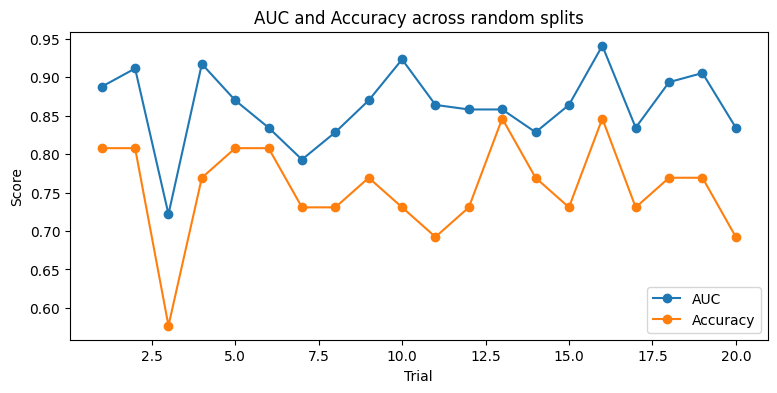

In [7]:
# Plot: AUC and Accuracy over trials
plt.figure(figsize=(9, 4))
plt.plot(range(1, N_TRIALS + 1), auc_scores, marker='o', label='AUC')
plt.plot(range(1, N_TRIALS + 1), acc_scores, marker='o', label='Accuracy')
plt.xlabel('Trial')
plt.ylabel('Score')
plt.title('AUC and Accuracy across random splits')
plt.legend()
# plt.savefig("accuracy.png")
plt.show()

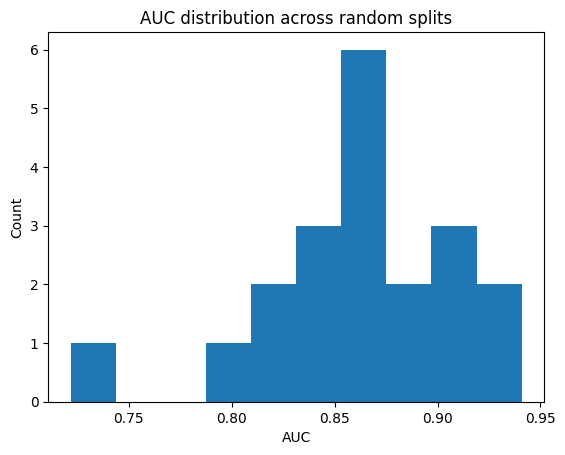

In [6]:
# Plot: Distribution of AUC
plt.hist(auc_scores, bins=10)
plt.xlabel('AUC')
plt.ylabel('Count')
plt.title('AUC distribution across random splits')
plt.show()